# <올리스트 데이터 분석 전처리 - orders (주문데이터)- 'order status' 컬럼 분석>
dataset : olist_orders_dataset.csv 
- 분석 내용
- 'order status' 컬럼내의 데이터 변경과 관련한 테이블 내 타 컬럼들 간 연관성 분석

# 0 데이터분석에 사용할 라이브러리 로드 

In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## 폰트 로드

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 1 데이터 셋 로드 

In [4]:
import glob

In [5]:
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [6]:
# 주문 정보를 od라는 데이터프레임에 담을것 
order = pd.read_csv(path[2])

# 2 데이터셋 정보 확인

In [7]:
order.shape
# 99441개의 인덱스(행)과 8개의 컬럼(열)이 있다는 뜻

(99441, 8)

In [8]:
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

각 컬럼들 정보 

- order_id : 주문번호 
- customer_id : 고객번호 - 근데 요거 path[0] 보면 customer_id는 구매시마다 새로 생기는 id임. customer_unique_id가 진짜 고객 번호

                즉, order 테이블에서는 어떤 고객이 뭘 샀는지는 알 수 없지만 시계열데이터를 알아볼 수 있음 
- order_status : 주문상태
- order_purchase_timestamp : 주문일자 
- order_approved_at : 지불승인일자 (금융사 카드결제/ 통장입금확인되어 주문이 매출로 잡히는 시간 같음)
- order_delivered_carrier_date : 물류팀에 인도된 일자 (송장 나온날짜 같음)
- order_delivered_customer_date  : 배송완료일자(수령일자)
- order_estimated_delivery_date : 예상배송완료일자

In [9]:
# 상단 5개 데이터 
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# 하단 5개 데이터 
order.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


## 데이터 타입, 기술통계값 확인

In [11]:
# order컬럼별 데이터 성격 . 
# 일단 다 object
# 시계열데이터는 pd.to_datetimed으로 데이터 타입 날짜로 바꿔주고 년/월/일 분리시 dt.year/month 요걸로 컬럼 나눠주기 
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# 시계열데이터 object -> datetime 으로 dtype 변경
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## 결측치확인

In [13]:
# null 값이 보이는데 한번 볼까? 
#  4   order_approved_at              99281 non-null  object       
#  5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
#  6   order_delivered_customer_date  96476 non-null  datetime64[ns]

# null 값이 몇개지?
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
order.isna().mean()*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

### 결측치 시각화 

<AxesSubplot:>

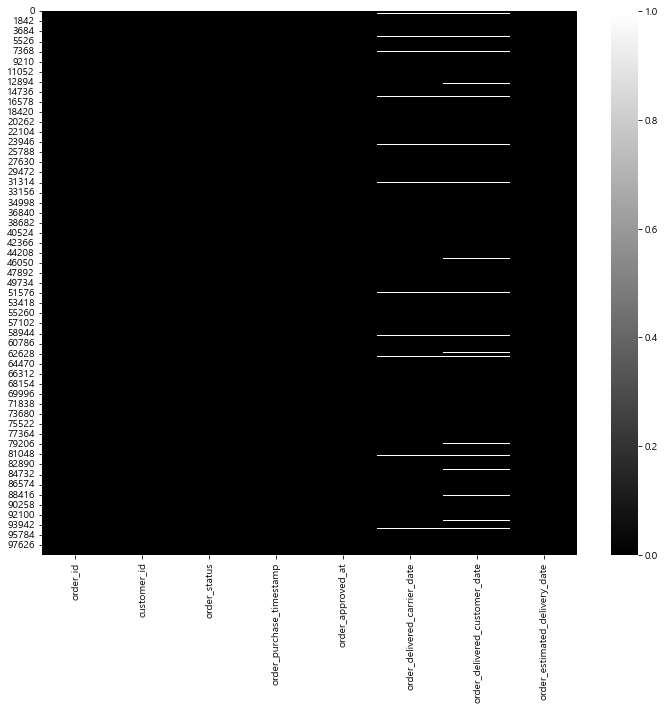

In [15]:
plt.figure(figsize = (12,10))
plt.xticks(rotation = 90)
sns.heatmap(order.isna(), cmap = 'gray')

# 3 df[’order_status’] == canceled로 변경되는 구간 4곳 분석

## 구간 1 >  order['order_approved_at'] = 주문승인날짜 컬럼 Null

In [16]:
#구간 1 설명 : 고객이 주문은 완료 하였으나(order_id가 입력이 되었으므로) 지불 전에 주문을 취소('canceled')한 상황
order[(order['order_status'].str.contains('canceled'))
      & (order['order_approved_at'].isnull())] #결제/지불이 완료되지 않은 상태 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


## 구간 2 >  order['order_delivered_carrier_date'] = 송장나온날짜 컬럼 Null 

In [17]:
#구간 2 설명 : 고객이 주문후 지불도 완료하였으나 판매자가 주문을 확인하기 전에 주문을 취소('canceled')한 상황
order[(order['order_status'].str.contains('canceled'))  #주문상태가 취소인 상태이면서 
      & (order['order_approved_at'].notnull()) #결제/지불이 완료되었지만
      & (order['order_delivered_carrier_date']).isnull()] # 판매자가 주문을 확인하지 않은 상태 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
1811,0966b61e30c4a07edbd7523f59b3f3e4,2fcc597b8934d99715dbfff7909dd27f,canceled,2018-05-22 18:50:55,2018-05-22 19:17:15,NaT,NaT,2018-07-03
1819,9021cf1919f615a121410790dcce848f,7acf55df0298e1d2c31200fb4f6fb93b,canceled,2018-07-04 16:05:56,2018-07-06 02:55:16,NaT,NaT,2018-08-22
1971,a39d3db795a5cf4c8b6c9dd050f0d326,ec66df2cb66dfda07c03050470e21f69,canceled,2017-03-13 16:12:24,2017-03-13 16:12:24,NaT,NaT,2017-03-30
2197,375f80ffc05feb35ce2680f1fa490575,8f6e5911262a8742393596bee2c09eac,canceled,2017-06-13 21:10:05,2017-06-13 21:22:35,NaT,NaT,2017-07-06
...,...,...,...,...,...,...,...,...
98496,2be6c8b958e16856397259974d4abee9,ccbce7bcb13ee88adcf78890cae0ea42,canceled,2018-04-02 18:20:00,2018-04-02 18:30:38,NaT,NaT,2018-04-19
98629,f5f8998eee8ec7bc513dc52847d64ce0,f4656b824844a039a87fd9c51ad3586a,canceled,2018-03-01 11:42:23,2018-03-01 12:20:32,NaT,NaT,2018-03-20
98771,5a8a4dc28b16fb90469ad749f9535773,c0c8b8bb055100a0cc08dcc04d847ac9,canceled,2018-03-13 10:58:09,2018-03-14 03:08:35,NaT,NaT,2018-03-23
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30


## 구간 3 >  order['order_delivered_customer_date'] = 배송완료일자 컬럼 Null

In [18]:
#구간 3 설명 : 고객이 주문후 지불을 완료하였고 판매자가 주문도 확인했으나 배송이 시작되기 전에 주문을 취소('canceled')한 상황
order[(order['order_status'].str.contains('canceled')) 
      & (order['order_approved_at'].notnull())  #결제/지불이 완료되었고
      & (order['order_delivered_carrier_date']).notnull()  # 판매자도 주문을 확인하였지만
      & (order['order_delivered_customer_date'].isnull())] #배송을 시작했는데 주문을 취소한 상태 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
5127,8a9cce19aa49e055f2babb81d5a71c40,f2676ef361959c938b35ecd32321adce,canceled,2018-02-01 10:04:20,2018-02-03 02:52:42,2018-02-05 20:41:28,NaT,2018-02-23
5449,c1049eef89915c6beb3604bf3d6588d7,ed16865bcadcea1a00a928bf418a74bf,canceled,2018-02-05 23:08:11,2018-02-05 23:29:26,2018-02-09 22:13:01,NaT,2018-03-07
5509,885935156ba43094f3ae95f3c14e0381,3885c59916b2b261205c303fe0a10abf,canceled,2018-02-02 16:06:44,2018-02-06 04:32:39,2018-02-07 20:48:31,NaT,2018-03-08
...,...,...,...,...,...,...,...,...
93172,47e96b5cb6f0592d336b6bf8a817d1c3,9cce7727e7d1d1a738ccc755eae38e93,canceled,2018-01-21 12:44:16,2018-01-22 13:49:10,2018-02-01 00:08:56,NaT,2018-02-19
94175,c9f06c1229ec7cd4ec9aed55d434b499,fa89053140d09081b3a3a4608a74c083,canceled,2018-02-05 20:26:29,2018-02-05 20:49:48,2018-02-06 19:49:32,NaT,2018-03-01
96300,1def7af24cb7182497acfd953f6dd88b,b35c38c2cd6a72b58cb104154d9782e4,canceled,2017-12-21 09:22:36,2017-12-23 02:12:37,2018-01-30 19:28:55,NaT,2018-02-20
97207,716bcd6dfe99970baf4aed2083136ed8,42715bff8f22b8dc62e5055b1e9fef7e,canceled,2018-02-03 13:37:35,2018-02-03 13:50:26,2018-02-05 19:59:59,NaT,2018-03-01


## 구간 4 >  orders 테이블의 전체 컬럼 Not Null

In [19]:
#구간 4 설명 : 고객이 주문후 지불을 완료하였고 판매자가 주문도 확인했으나 고객이 상품을 받고 난 후에 환불 신청을('canceled')한 상황
order[(order['order_status'].str.contains('canceled')) 
      & (order['order_approved_at'].notnull()) #결제/지불이 완료되었고
      & (order['order_delivered_carrier_date']).notnull()  # 판매자도 주문을 확인하였지만
      & (order['order_delivered_customer_date'].notnull())] # 고객이 상품을 받고 난 후에 환불 신청을 한 상태

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


In [20]:
order[(order['order_status'].str.contains('canceled')) 
      & (order['order_approved_at'].notnull()) 
      & (order['order_delivered_carrier_date']).notnull()
      & (order['order_delivered_customer_date'].notnull())].shape

(6, 8)

In [21]:
#주문이 이루어 진 후 시간에 따라 아래의 값으로 변한다.
order['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [22]:
#주문 만 완료
order[(order['order_status'].str.contains('created'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


In [23]:
#전 주문단계에서 발생한 모든 주문취소 
order[(order['order_status'].str.contains('canceled'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [24]:
#주문 완료 & 결제 완료
order[(order['order_status'].str.contains('approved'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


In [25]:
#주문완료 & 결제완료, 판매자 주문 확인 전 
order[(order['order_status'].str.contains('processing'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04
...,...,...,...,...,...,...,...,...
97400,dcdfc540e42725663242bb884c28f0a6,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaT,NaT,2017-11-23
97666,e471815e7114cdb474064f7dbb1a8b67,092c9316ae71b2fe43e526043f351967,processing,2017-12-20 11:00:02,2017-12-20 11:10:43,NaT,NaT,2018-02-02
98089,10951d02d64917a34959abeb8130601e,3e6754e591ff3568ccc5bf69a649918c,processing,2018-02-13 21:02:02,2018-02-15 04:11:21,NaT,NaT,2018-03-13
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26


In [26]:
#주문완료 & 결제완료 & 판매자 주문 확인완료, 그러나 판매자측 주문 취소 
order[(order['order_status'].str.contains('unavailable'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [27]:
#주문완료 & 결제완료 & 판매자 주문 승인
order[(order['order_status'].str.contains('invoiced'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17


In [28]:
#주문완료 & 결제완료 & 판매자 주문 확인완료, 배송중
order[(order['order_status'].str.contains('shipped'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaT,2017-11-24
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24


In [29]:
#주문완료 & 결제완료 & 판매자 주문 확인완료, 배송완료
order[(order['order_status'].str.contains('delivered'))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
